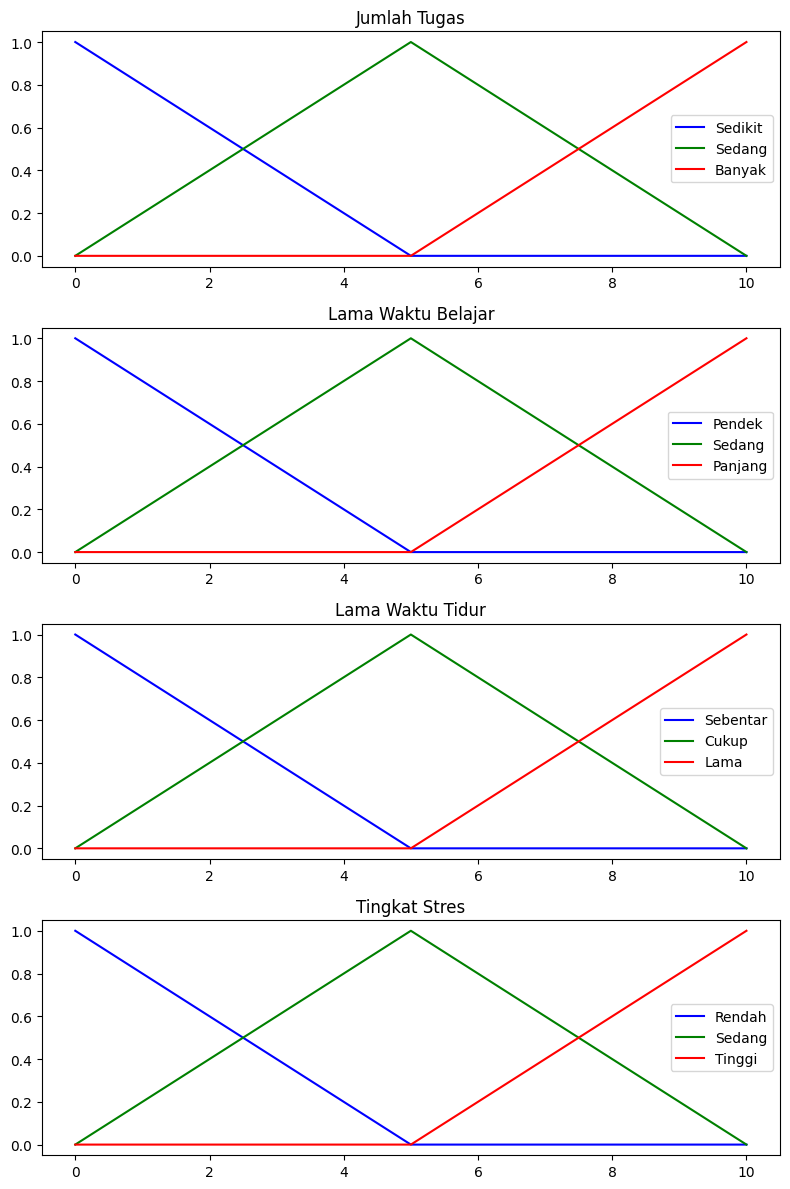

Tingkat Stres: 5.11


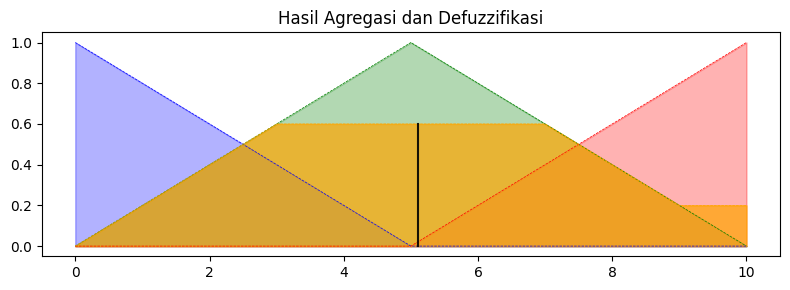

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Definisi variabel fuzzy
# Input 1: Jumlah Tugas
x_tugas = np.arange(0, 11, 1)
low_tugas = fuzz.trimf(x_tugas, [0, 0, 5])
medium_tugas = fuzz.trimf(x_tugas, [0, 5, 10])
high_tugas = fuzz.trimf(x_tugas, [5, 10, 10])

# Input 2: Lama Waktu Belajar
x_belajar = np.arange(0, 11, 1)
short_belajar = fuzz.trimf(x_belajar, [0, 0, 5])
medium_belajar = fuzz.trimf(x_belajar, [0, 5, 10])
long_belajar = fuzz.trimf(x_belajar, [5, 10, 10])

# Input 3: Lama Waktu Tidur
x_tidur = np.arange(0, 11, 1)
short_tidur = fuzz.trimf(x_tidur, [0, 0, 5])
medium_tidur = fuzz.trimf(x_tidur, [0, 5, 10])
long_tidur = fuzz.trimf(x_tidur, [5, 10, 10])

# Output: Tingkat Stres
x_stress = np.arange(0, 11, 1)
low_stress = fuzz.trimf(x_stress, [0, 0, 5])
medium_stress = fuzz.trimf(x_stress, [0, 5, 10])
high_stress = fuzz.trimf(x_stress, [5, 10, 10])

# Visualisasi fungsi keanggotaan
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 12))

ax0.plot(x_tugas, low_tugas, 'b', label='Sedikit')
ax0.plot(x_tugas, medium_tugas, 'g', label='Sedang')
ax0.plot(x_tugas, high_tugas, 'r', label='Banyak')
ax0.set_title('Jumlah Tugas')
ax0.legend()

ax1.plot(x_belajar, short_belajar, 'b', label='Pendek')
ax1.plot(x_belajar, medium_belajar, 'g', label='Sedang')
ax1.plot(x_belajar, long_belajar, 'r', label='Panjang')
ax1.set_title('Lama Waktu Belajar')
ax1.legend()

ax2.plot(x_tidur, short_tidur, 'b', label='Sebentar')
ax2.plot(x_tidur, medium_tidur, 'g', label='Cukup')
ax2.plot(x_tidur, long_tidur, 'r', label='Lama')
ax2.set_title('Lama Waktu Tidur')
ax2.legend()

ax3.plot(x_stress, low_stress, 'b', label='Rendah')
ax3.plot(x_stress, medium_stress, 'g', label='Sedang')
ax3.plot(x_stress, high_stress, 'r', label='Tinggi')
ax3.set_title('Tingkat Stres')
ax3.legend()

plt.tight_layout()
plt.show()

# Rule base dan inferensi
# Contoh input
jumlah_tugas = 7
lama_belajar = 6
lama_tidur = 4

# Fuzzifikasi
tugas_level_low = fuzz.interp_membership(x_tugas, low_tugas, jumlah_tugas)
tugas_level_medium = fuzz.interp_membership(x_tugas, medium_tugas, jumlah_tugas)
tugas_level_high = fuzz.interp_membership(x_tugas, high_tugas, jumlah_tugas)

belajar_level_short = fuzz.interp_membership(x_belajar, short_belajar, lama_belajar)
belajar_level_medium = fuzz.interp_membership(x_belajar, medium_belajar, lama_belajar)
belajar_level_long = fuzz.interp_membership(x_belajar, long_belajar, lama_belajar)

tidur_level_short = fuzz.interp_membership(x_tidur, short_tidur, lama_tidur)
tidur_level_medium = fuzz.interp_membership(x_tidur, medium_tidur, lama_tidur)
tidur_level_long = fuzz.interp_membership(x_tidur, long_tidur, lama_tidur)

# Rule evaluation
rule1 = np.fmin(np.fmin(tugas_level_high, belajar_level_long), tidur_level_short)
stress_activation_high = np.fmin(rule1, high_stress)

rule2 = np.fmin(np.fmin(tugas_level_medium, belajar_level_medium), tidur_level_medium)
stress_activation_medium = np.fmin(rule2, medium_stress)

rule3 = np.fmin(np.fmin(tugas_level_low, belajar_level_short), tidur_level_long)
stress_activation_low = np.fmin(rule3, low_stress)

# Agregasi
aggregated = np.fmax(stress_activation_low, 
                     np.fmax(stress_activation_medium, stress_activation_high))

# Defuzzifikasi
stress_result = fuzz.defuzz(x_stress, aggregated, 'centroid')
stress_activation = fuzz.interp_membership(x_stress, aggregated, stress_result)

print(f"Tingkat Stres: {stress_result:.2f}")

# Visualisasi hasil
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_stress, low_stress, alpha=0.3, color='b')
ax0.plot(x_stress, low_stress, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_stress, medium_stress, alpha=0.3, color='g')
ax0.plot(x_stress, medium_stress, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_stress, high_stress, alpha=0.3, color='r')
ax0.plot(x_stress, high_stress, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_stress, aggregated, alpha=0.7, color='orange')
ax0.plot(x_stress, aggregated, 'orange', linewidth=0.5, linestyle='--')
ax0.plot([stress_result, stress_result], [0, stress_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Hasil Agregasi dan Defuzzifikasi')

plt.tight_layout()
plt.show()
